<a href="https://colab.research.google.com/github/DNA-121102/prakt-data-mining-25/blob/main/DANI_NOVRIAN_Template_Tugas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 1: Praktikum Data Mining
- **Nama** : Dani Novrian Ahmad Lumban Gaol
- **NIM**  : 225090407111055

# **1. Perkenalan Dataset**


## Detail Data Transaksi

- **TransactionID**: Identifikasi alfanumerik unik untuk setiap transaksi.
- **AccountID**: Identifikasi unik untuk setiap akun, dengan kemungkinan memiliki beberapa transaksi.
- **TransactionAmount**: Nilai moneter dari setiap transaksi, mencakup pengeluaran kecil sehari-hari hingga pembelian besar.
- **TransactionDate**: Stempel waktu dari setiap transaksi, mencatat tanggal dan waktu.
- **TransactionType**: Kategori transaksi yang menunjukkan 'Kredit' atau 'Debet'.
- **Location**: Lokasi geografis transaksi, direpresentasikan dengan nama kota di AS.
- **DeviceID**: Identifikasi alfanumerik perangkat yang digunakan untuk melakukan transaksi.
- **IP Address**: Alamat IPv4 yang terkait dengan transaksi, dengan kemungkinan perubahan sesekali untuk beberapa akun.
- **MerchantID**: Identifikasi unik untuk pedagang, menunjukkan pedagang yang sering digunakan dan pedagang yang jarang digunakan untuk setiap akun.
- **AccountBalance**: Saldo dalam akun setelah transaksi, dengan korelasi logis berdasarkan jenis dan jumlah transaksi.
- **PreviousTransactionDate**: Stempel waktu dari transaksi terakhir dalam akun, membantu dalam menghitung frekuensi transaksi.
- **Channel**: Kanal tempat transaksi dilakukan (misalnya, Online, ATM, Cabang).
- **CustomerAge**: Usia pemegang akun, dengan pengelompokan logis berdasarkan pekerjaan.
- **CustomerOccupation**: Pekerjaan pemegang akun (misalnya, Dokter, Insinyur, Mahasiswa, Pensiunan), mencerminkan pola pendapatan.
- **TransactionDuration**: Durasi transaksi dalam detik, bervariasi berdasarkan jenis transaksi.
- **LoginAttempts**: Jumlah upaya login sebelum transaksi, dengan nilai lebih tinggi menunjukkan kemungkinan anomali.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df=pd.read_csv('dataset_tugas1.csv')

In [4]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [33]:
# 1. Memahami Struktur Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

$\textbf{Note}:$
Berdasarkan info dari dataframe, diketahui bahwa dataframe $\textit{df}$ mempunyai sebanyak $2512$ baris dan $16$ kolom. Dimana dari 16 kolom masing-masing memiliki tipe data object, float, atau integer. Untuk kolom yang memiliki type data object yaitu {TransactionID, AccountID, TransactionDate, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerOccupation, PreviousTransactionDate} merupakan data kategorikal kemudian untuk data yang bertipe integer atau float yaitu {TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, AccountBalance} merupakan data numerical.

In [34]:
# 2. Menangani Data yang Hilang
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


$\textbf{Note}:$ Setelah dianalisis, ternyata data yang digunakan tidak memiliki $\textit{missing values}$ untuk kolom manapun. Sehingga tidak perlu dilakukan analisis lanjutan untuk menangani $\textit{missing values}$ tersebut.

In [35]:
# 3.  Analisis Distribusi dan Korelasi
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


$\textbf{Note}:$ Menggunakan $\textit{statistika deskriptif}$, diperoleh jumlah entry untuk masing-masing kolom numerical semuanya memiliki $2512$ data. Kemudian untuk nilai $\textit{meadn}$, $\textit{standard deviasi}$, $\textit{min}$, $\textit{max}$, dan $\textit{quartile}$ 1, 2, 3 dapat dilihat lebih jelas pada tabel diatas. Pada kolom 'TransactionAmount', 'AccountBalance', dan 'TransactionDuration' dapat dilihat standard deviasinya cukup besar yang mengindikasikan data sangat bervariasi dan tersebar cukup jauh dari rata-rata. Pada bagian quartile untuk kolom 'TransactionAmount', 'AccountBalance', dan 'TransactionDuration	' kita sudah bisa melihat seberapa bervasiasi nya nilai-nilai pada kolom-kolom tersebut . Kemudian pada kolom 'Login attempts' diperoleh diperoleh nilai standard deviasi yang cukup kecil yang mengindikasikan bahwasanya variasi data pada kolom tersebut cukup kecil juga. Kemudian dengan melihat nilai $\textit{quartile}$ pada kolom tersebut, yang dimana memiliki nilai '1' untuk q1, q2, dan q1 memberi $\textit{insight}$ kepada kita betapa tidak bervariasinya nilai-nilai pada kolom tersebut.

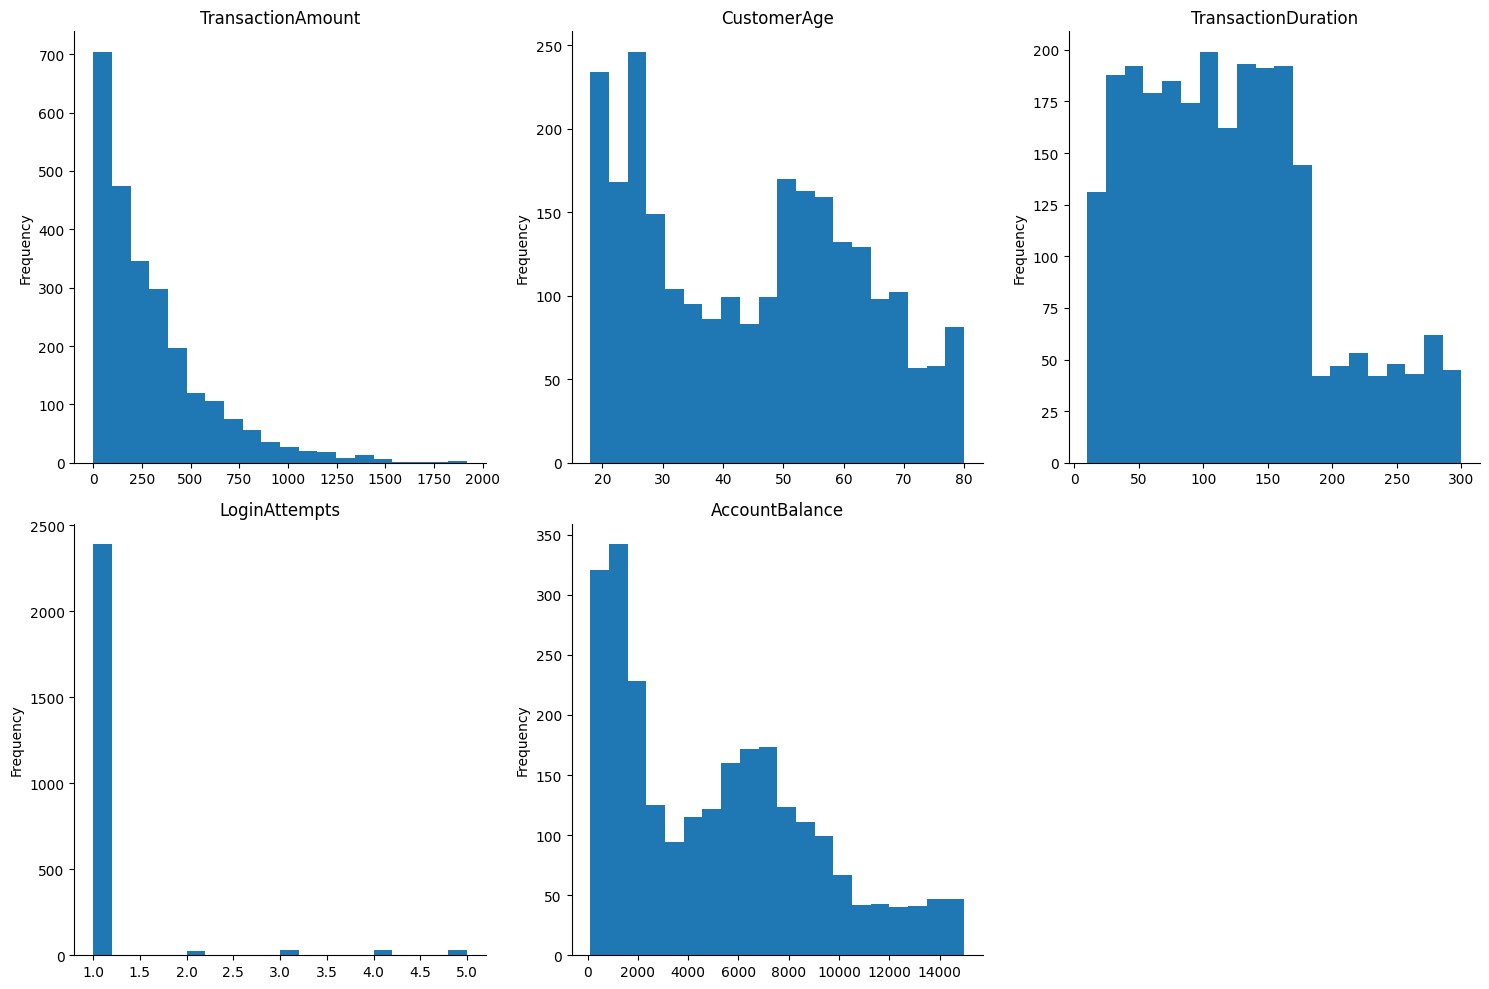

In [28]:
# Membuat figure dan axes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 baris, 3 kolom

# List kolom yang akan divisualisasikan
columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Plot histogram untuk masing-masing kolom
for i, col in enumerate(columns):
    row, col_pos = divmod(i, 3)  # Menghitung posisi subplot berdasarkan indeks
    ax = axes[row, col_pos]
    df[col].plot(kind='hist', bins=20, ax=ax, title=col)
    ax.spines[['top', 'right']].set_visible(False)  # Menyembunyikan tepi atas dan kanan

# Hapus subplot kosong terakhir
fig.delaxes(axes[1, 2])

# Menampilkan plot
plt.tight_layout()
plt.show()

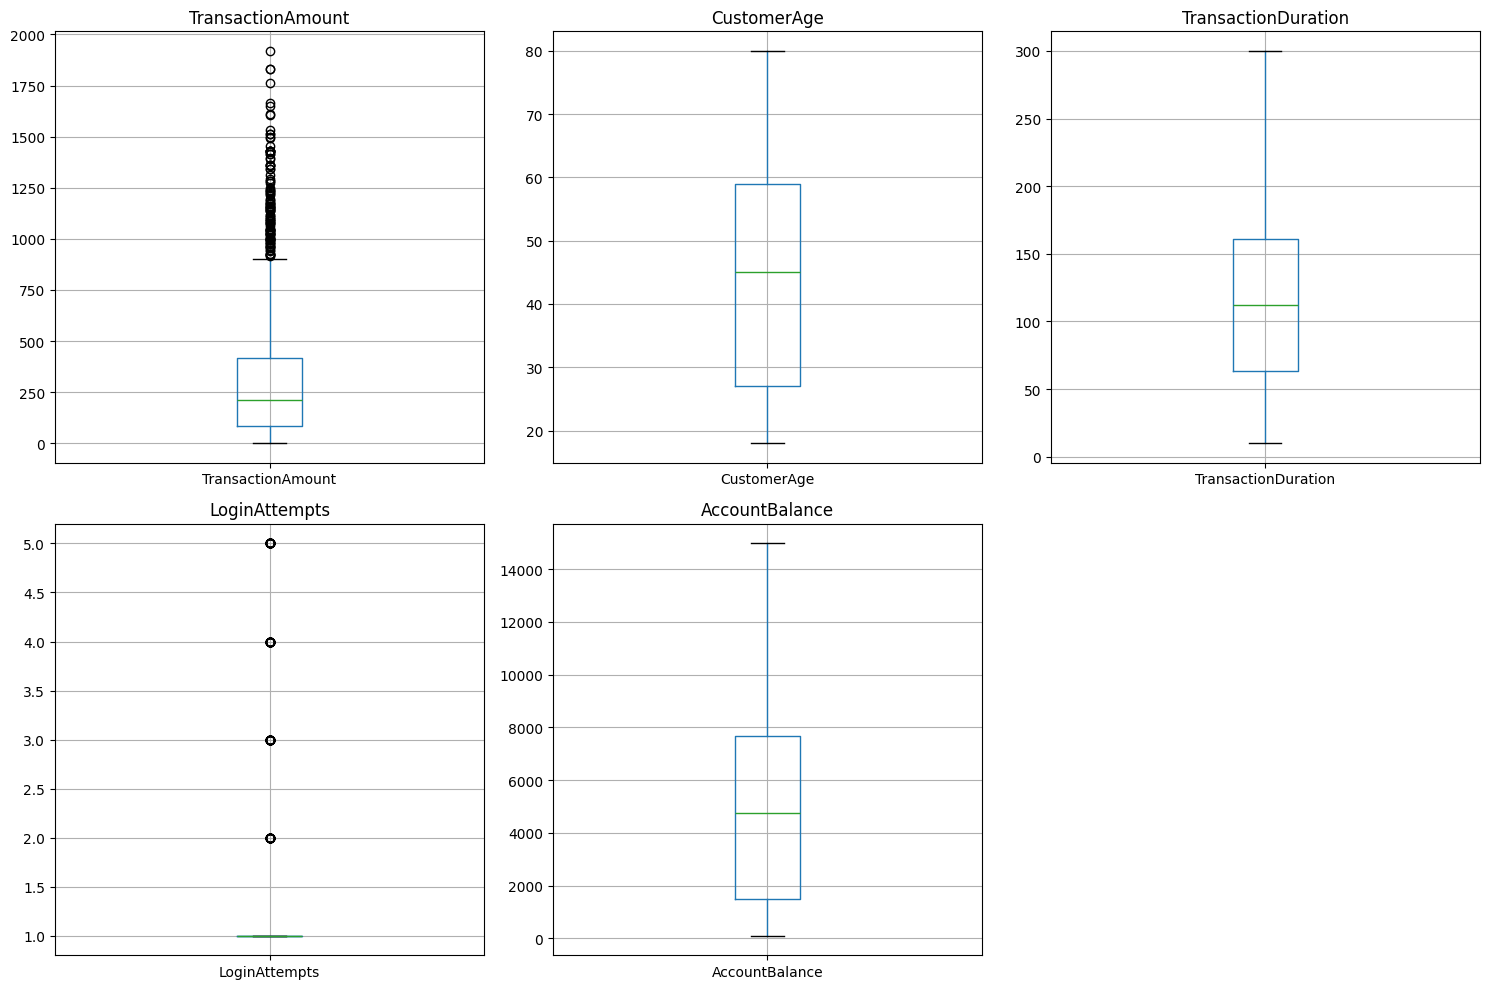

In [30]:
# Membuat figure dan axes untuk boxplot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 baris, 3 kolom

# Plot boxplot untuk masing-masing kolom
for i, col in enumerate(columns):
    row, col_pos = divmod(i, 3)  # Menghitung posisi subplot berdasarkan indeks
    ax = axes[row, col_pos]
    df.boxplot(column=[col], ax=ax)
    ax.set_title(col)

# Hapus subplot kosong terakhir
fig.delaxes(axes[1, 2])

# Menampilkan plot
plt.tight_layout()
plt.show()

$\textbf{Note}:$ Hasil visual diatas baik histogram dan boxplot menuju kearah insight yang sama seperti yang sudah didapatkan ketika menganalisis hasil $\textit{statistika deskriptif}$ sebelumnya. Dapat dilihat pada visual histogram yang menggunakan bins 20 (membagi rentang nilai menjadi 20 bagian) terutama pada kolom 'TransactionAmount' dan 'AccountBalance' nilai data sangat menyebar bervariasi cukup jauh dari rata-rata masing-masing kolom. Kemudian, untuk kolom 'LoginAttempts' dapat dilihat data menyebar di nilai '1' dan memiliki beberapa outlier yang juga ditujukkan oleh visualisasi boxplot. Untuk visualisasi boxplot, nilai outlier hanya terdapat pada kolom 'TransactionAmount' dan 'LoginAttempts' yang terlihat secara masif pada kolom 'TransactionAmount.

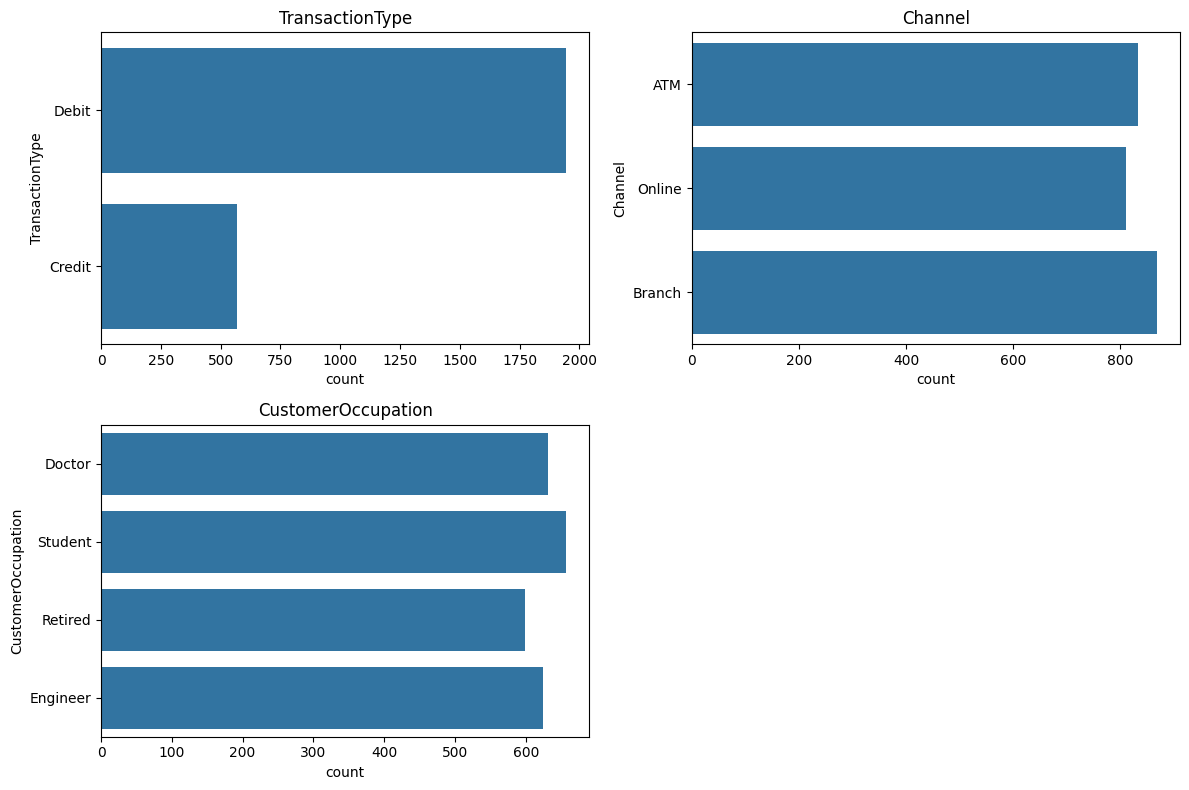

In [21]:
# 4. Visualisasi Data
# Membuat figure dan axes untuk diagram batang variabel kategorikal
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 baris, 2 kolom

# List kolom kategorikal yang dipilih
categorical_columns = ['TransactionType','Channel', 'CustomerOccupation']

# Plot diagram batang untuk masing-masing kolom kategorikal
for i, col in enumerate(categorical_columns):
    row, col_pos = divmod(i, 2)
    ax = axes[row, col_pos]
    sns.countplot(y=df[col], ax=ax)
    ax.set_title(col)

# Hapus subplot kosong terakhir
fig.delaxes(axes[1, 1])

# Menampilkan plot
plt.tight_layout()
plt.show()


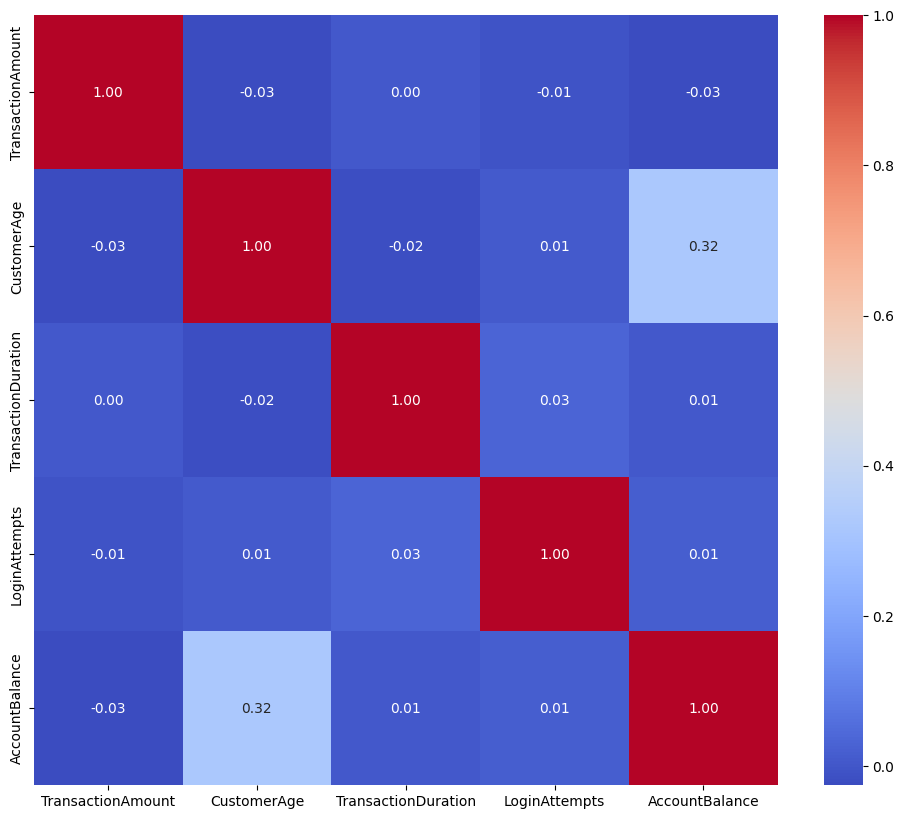

In [24]:
numerical_columns=df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

$\textbf{Note}:$ Hasil visual diatas merupakan visualisasi heatmap. Heatmap tersebut menunjukkan matriks korelasi antar variabel numerik dalam dataset, dengan skala warna dari biru (korelasi rendah) hingga merah (korelasi tinggi). Diagonal Berwarna Merah Gelap (Nilai 1.00) menunjukkan bahwa setiap variabel memiliki korelasi sempurna dengan dirinya sendiri (nilai korelasi = 1.00). CustomerAge & AccountBalance (0.32) → Memiliki korelasi positif cukup lemah. Variabel lain memiliki korelasi sangat rendah (hampir 0), menunjukkan tidak ada hubungan linier yang kuat di antara mereka.

$\textbf{Kesimpulan}:$ Tidak ada variabel yang memiliki korelasi tinggi satu sama lain, menunjukkan bahwa dataset ini tidak memiliki multikolinearitas yang signifikan.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [25]:
df.duplicated().sum()

np.int64(0)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.